In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
import os

In [2]:
savepath = ''

# Processing data

In [3]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (Year)','Disruption_p']]
    df['Sample (Year)'] = df['Sample (Year)'].astype(int)
    return df

In [4]:
def get_coef(x):
    if '*' in x:
        x = x[:x.find('*')]
    elif '. ' in x:
        x = x[:x.find('. ')]
    else:
        x = x[:x.find(' ')]
    return float(x)
def get_ci(x):
    x = x[x.find('(')+1:x.find(')')]
    if x!='NA':
        return float(x)*1.96
    else:
        return 0
def get_star(x):
    if '***' in x:
        return '***'
    elif '**' in x:
        return '**'
    elif '*' in x:
        return '*'
    else:
        return ' '

In [5]:
path = ''

In [15]:
df11 = pd.read_csv(path + 'reg51.csv')
df12 = pd.read_csv(path + 'reg52.csv')
df13 = pd.read_csv(path + 'reg53.csv')
df14 = pd.read_csv(path + 'reg54.csv')

In [16]:
dflst = [df11,df12,df13,df14]

In [17]:
dflst2 = []
for d in dflst:
    d = get_df(d)
    d['coef1'] = d[d.columns[1]].apply(get_coef)
    d['star1'] = d[d.columns[1]].apply(get_star)
    d['ci1'] = d[d.columns[1]].apply(get_ci)

    dflst2.append(d)

# Draw

In [18]:
colors = ["#C0392B","#1F618D","#AF601A","#117A65"]
labellst = ['P (Patents)','P(Clinical trials)','P (News)','P (Tweets)',]

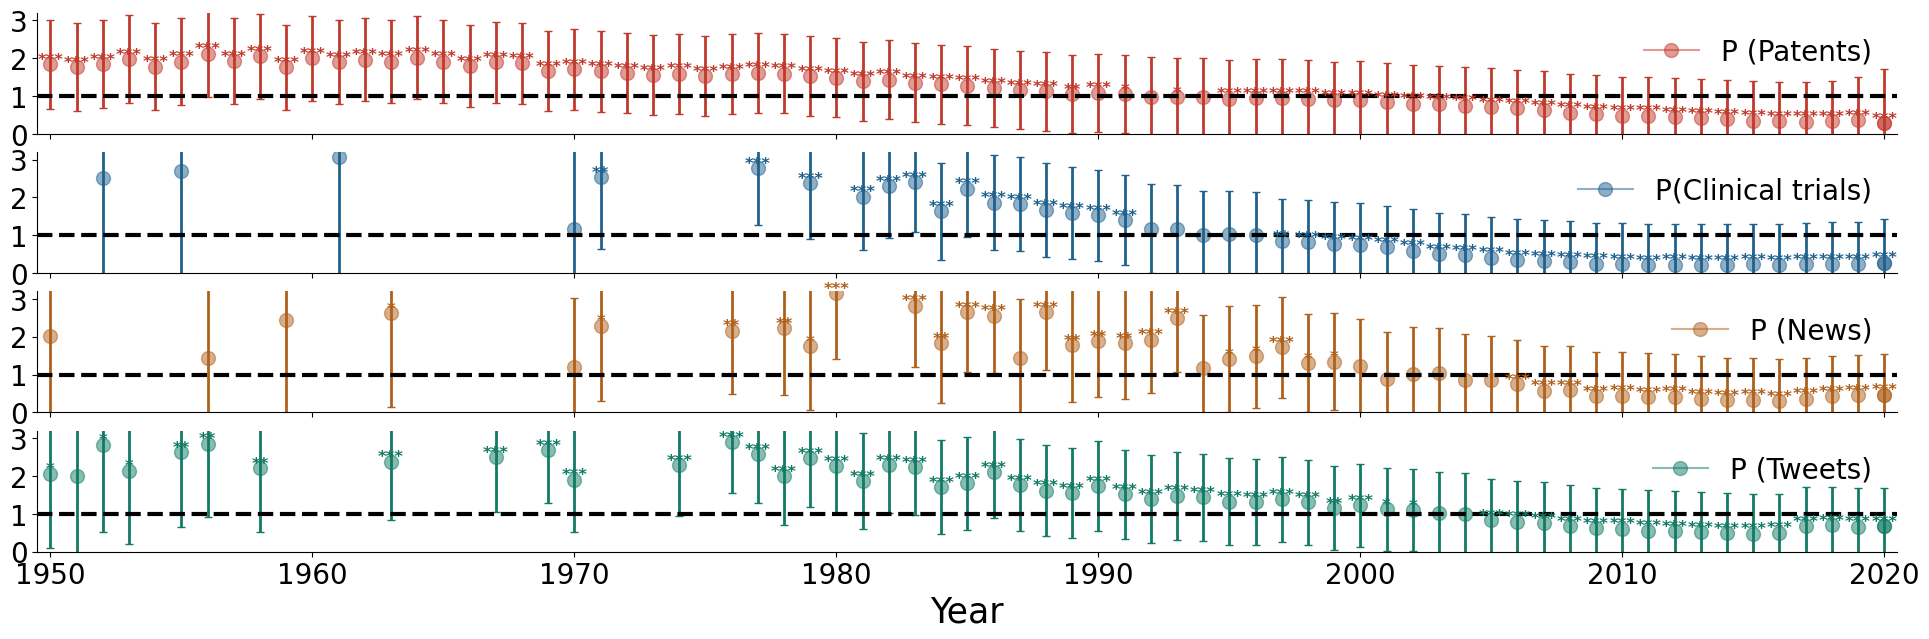

In [22]:
plt.subplots(4,1,figsize=(24,7),sharex = True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.15)

for i in range(4):
    ax = plt.subplot(4,1,i+ 1)
    d = dflst2[i]
    for _ in range(len(d)):
        if d['coef1'].values[_]<=2:
            ax.plot(d['Sample (Year)'].values[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10)
            ax.errorbar(d['Sample (Year)'].values[_],d['coef1'].values[_], yerr = d['ci1'].values[_] ,ecolor=colors[i], elinewidth=2 , capsize= 3 )
            ax.text(d['Sample (Year)'].values[_],d['coef1'].values[_], d['star1'].values[_] ,color=colors[i], fontsize=12, ha='center', fontweight='bold')
    ax.plot(d['Sample (Year)'].values[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10,label = labellst[i])
    plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    plt.yticks(size = 20)
    plt.ylim(-1.8,1.8)
    plt.xlim(1949.5,2020.5)
    plt.xticks(size = 20)
    plt.legend(fontsize = 20,frameon=False,loc='upper right')
    plt.xlabel('')
    if i>2:
        plt.xlabel('Year',fontsize = 25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath + "a.svg",bbox_inches = 'tight')

# Draw2

In [16]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (Year)','log(NDC+1)']]
    df['Sample (Year)'] = df['Sample (Year)'].astype(int)
    return df

In [17]:
df21 = pd.read_csv(path + 'reg61.csv')
df22 = pd.read_csv(path + 'reg62.csv')
df23 = pd.read_csv(path + 'reg63.csv')
df24 = pd.read_csv(path + 'reg64.csv')

In [18]:
dflst = [df21,df22,df23,df24]

In [19]:
dflst2 = []
for d in dflst:
    d = get_df(d)
    d['coef1'] = d[d.columns[1]].apply(get_coef)
    d['star1'] = d[d.columns[1]].apply(get_star)
    d['ci1'] = d[d.columns[1]].apply(get_ci)
    dflst2.append(d)

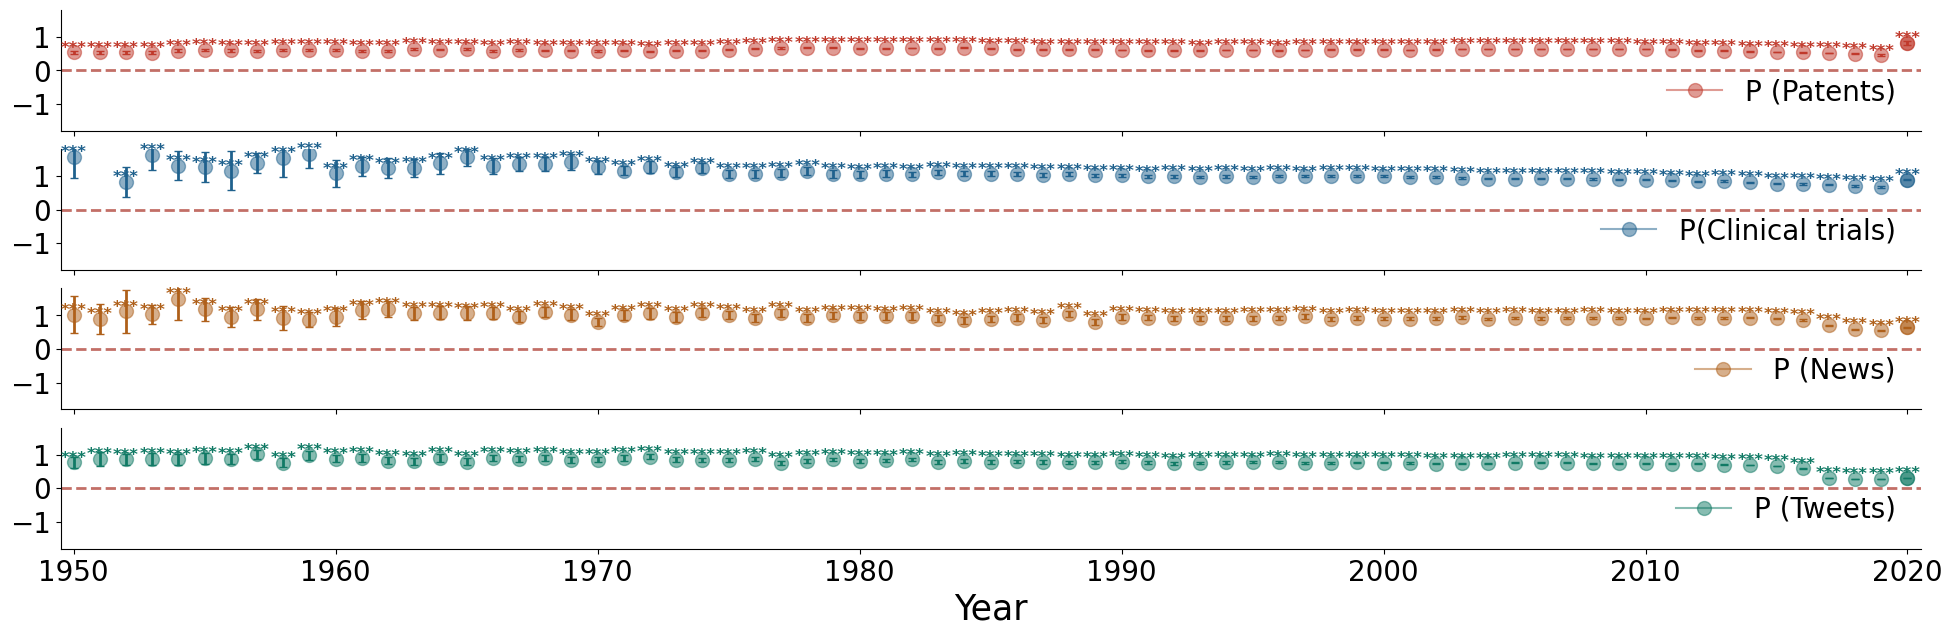

In [20]:
plt.subplots(4,1,figsize=(24,7),sharex = True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.15)

for i in range(4):
    ax = plt.subplot(4,1,i+ 1)
    d = dflst2[i]
    for _ in range(len(d)):
        if d['coef1'].values[_]<=2:
            ax.plot(d['Sample (Year)'].values[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10)
            ax.errorbar(d['Sample (Year)'].values[_],d['coef1'].values[_], yerr = d['ci1'].values[_] ,ecolor=colors[i], elinewidth=2 , capsize= 3 )
            ax.text(d['Sample (Year)'].values[_],d['coef1'].values[_], d['star1'].values[_] ,color=colors[i], fontsize=12, ha='center', fontweight='bold')
    ax.plot(d['Sample (Year)'].values[_],d['coef1'].values[_], marker='o',color=colors[i],alpha=.5, markersize = 10,label = labellst[i])
    plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    plt.yticks(size = 20)
    plt.ylim(-1.8,1.8)
    plt.xlim(1949.5,2020.5)
    plt.xticks(size = 20)
    plt.legend(fontsize = 20,frameon=False,loc='lower right')
    plt.xlabel('')
    if i>2:
        plt.xlabel('Year',fontsize = 25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath + "b.svg",bbox_inches = 'tight')